In [2]:
import os
import pickle
import argparse
import urllib.request
from pathlib import Path
from PIL import Image

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import cv2
import numpy as np

from oemer import MODULE_PATH
from oemer import layers
from oemer.inference import inference
from oemer.utils import get_logger
from oemer.dewarp import estimate_coords, dewarp
from oemer.staffline_extraction import extract as staff_extract
from oemer.notehead_extraction import extract as note_extract
from oemer.note_group_extraction import extract as group_extract
from oemer.symbol_extraction import extract as symbol_extract
from oemer.rhythm_extraction import extract as rhythm_extract
from oemer.build_system import MusicXMLBuilder
from oemer.draw_teaser import teaser


logger = get_logger(__name__)

C:\Users\Minjoo Lee\.conda\envs\oemer\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CoreMLExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(
C:\Users\Minjoo Lee\.conda\envs\oemer\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


1612 2280


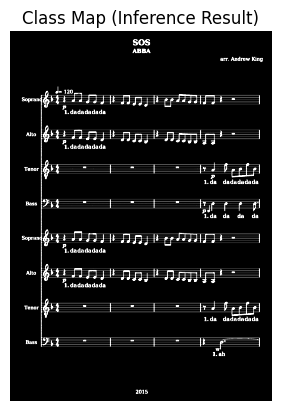

In [2]:
import matplotlib.pyplot as plt

# 모델 경로와 이미지 경로 설정
model_path = "checkpoints/unet_big"
img_path = "C:/Users/Minjoo Lee/MelodyDots/oemer/ds2_dense/images/lg-3948783-aug-beethoven--page-1.png"

# 이미지 추론 수행
class_map, _ = inference(model_path, img_path, step_size=128, batch_size=16, manual_th=None, use_tf=False)

# class_map을 이미지로 시각화하여 박자표에 해당하는 픽셀 값 확인
plt.imshow(class_map, cmap='gray', vmin=0, vmax=1) 
plt.title("Class Map (Inference Result)")
plt.axis('off')
plt.show()

In [3]:
# class_map을 색상으로 변환하여 시각화
def visualize_class_map(class_map):
    # 클래스에 해당하는 색상 지정
    colors = [
        (0, 0, 0),      # 배경 (검정색)
        (255, 0, 0),    # 기둥과 쉼표 (파란색)
        (0, 255, 0),    # 음표 머리 (초록색)
        (0, 0, 255),    # 음자리표 (빨간색)
        (255, 255, 255) # 박자표 (흰색)
    ]

    # 각 클래스에 해당하는 색상으로 변환
    colored_image = np.zeros((*class_map.shape, 3), dtype=np.uint8)
    for class_idx, color in enumerate(colors):
        colored_image[class_map == class_idx] = color

    return colored_image

# 시각화
colored_class_map = visualize_class_map(class_map)
plt.imshow(colored_class_map)
plt.title("Class Map (Inference Result)")
plt.axis('off')
plt.show()

NameError: name 'class_map' is not defined

In [4]:
class_map

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

1612 2280


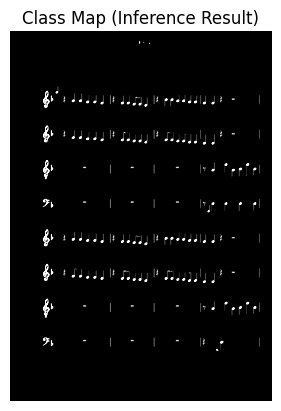

In [5]:
import matplotlib.pyplot as plt

# 모델 경로와 이미지 경로 설정
model_path = "checkpoints/seg_net"
img_path = "C:/Users/Minjoo Lee/MelodyDots/oemer/ds2_dense/images/lg-3948783-aug-beethoven--page-1.png"

# 이미지 추론 수행
class_map, _ = inference(model_path, img_path, step_size=128, batch_size=16, manual_th=None, use_tf=False)

# class_map을 이미지로 시각화하여 박자표에 해당하는 픽셀 값 확인
plt.imshow(class_map, cmap='gray', vmin=0, vmax=1) 
plt.title("Class Map (Inference Result)")
plt.axis('off')
plt.show()

In [1]:
import cv2

# class_map을 색상으로 변환하여 시각화
def visualize_class_map(class_map):
    # 클래스에 해당하는 색상 지정
    colors = [
        (0, 0, 0),      # 배경 (검정색)
        (255, 0, 0),    # 기둥과 쉼표 (파란색)
        (0, 255, 0),    # 음표 머리 (초록색)
        (0, 0, 255),    # 음자리표 (빨간색)
        (0, 0, 255) # 박자표 (흰색)
    ]

    # 각 클래스에 해당하는 색상으로 변환
    colored_image = np.zeros((*class_map.shape, 3), dtype=np.uint8)
    for class_idx, color in enumerate(colors):
        colored_image[class_map == class_idx] = color

    return colored_image

# 시각화
colored_class_map = visualize_class_map(class_map)
plt.imshow(colored_class_map)
plt.title("Class Map (Inference Result)")
plt.axis('off')
plt.show()

NameError: name 'class_map' is not defined